In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

from utils import *

### Fetch evaluation statistics

In [2]:
data = pd.read_csv(PATH / 'statistics.csv', names=['run', 'lap', 'seed', 'fid', 'isc'])
data = pd.concat((
    data[data.run == 'brisk-violet-19_j2mcd2x5'],
    data[data.run == 'dandy-cherry-17_sspxwzxa'],
    data[data.run == 'proud-glitter-18_ju7gfg9d'],
    data[data.run == 'iconic-disco-20_tw5lit5o'],
    data[data.run == 'eager-bush-21_bddhh5lh'],
))

labels = [
    'Tweedie (25\%)',
    'Tweedie (50\%)',
    'Tweedie (75\%)',
    '$(I + \Sigma_t^{-1})^{-1}$ (75\%)',
    '$\Sigma_t$ (75\%)',
]

In [3]:
data[data.lap == 31]

,run,lap,seed,fid,isc
189,brisk-violet-19_j2mcd2x5,31,0,5.882213,8.826493
254,dandy-cherry-17_sspxwzxa,31,0,6.764123,8.752283
223,proud-glitter-18_ju7gfg9d,31,0,13.176847,8.142036
160,iconic-disco-20_tw5lit5o,31,0,39.940027,7.688601
126,eager-bush-21_bddhh5lh,31,0,118.692880,4.231917


### Plots

In [4]:
rc = {
    'axes.axisbelow': True,
    'axes.linewidth': 1.0,
    'figure.dpi': 150,
    'figure.figsize': (3.2, 2.4),
    'font.size': 12.0,
    'legend.fontsize': 'xx-small',
    'lines.linewidth': 1.0,
    'savefig.transparent': True,
    'xtick.labelsize': 'x-small',
    'xtick.major.width': 1.0,
    'ytick.labelsize': 'x-small',
    'ytick.major.width': 1.0,
    'font.family': ['serif'],
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
}

plt.rcParams.update(rc)
sb.set_palette(sb.color_palette('deep'))

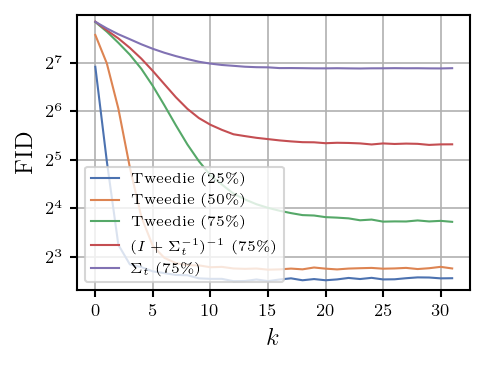

In [5]:
ax = sb.lineplot(data, x='lap', y='fid', hue='run')

ax.grid()
ax.set_ylim(5, 254)
ax.set_yscale('log', base=2)
ax.set_xlabel('$k$')
ax.set_ylabel('FID')

handles, _ = ax.get_legend_handles_labels()

ax.legend(handles, labels, loc='lower left')

fig = plt.gcf()
fig.tight_layout(pad=0.5)
fig.savefig('cifar_fid.pdf', dpi=300)

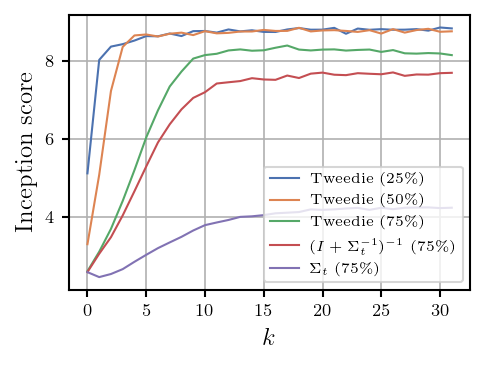

In [6]:
ax = sb.lineplot(data, x='lap', y='isc', hue='run')

ax.grid()
ax.set_xlabel('$k$')
ax.set_ylabel('Inception score')

handles, _ = ax.get_legend_handles_labels()

ax.legend(handles, labels, loc='lower right')

fig = plt.gcf()
fig.tight_layout(pad=0.5)
fig.savefig('cifar_isc.pdf', dpi=300)